In [1]:
# VISUALIZAÇÕES COMPLETAS - ANÁLISE DE CHURN TELECOMUNICAÇÕES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [3]:

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# Como visto a cima varias colunas vieram aninhas,um desafio já que nas aulas tivemos apenas 1 coluna aninhada.
# Então houve a necessidade de utilizar o metodo (concat)
# Combine as colunas aninhadas em colunas planas
# Processamento dos dados
df_clean = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(df['customer']),
    pd.json_normalize(df['phone']),
    pd.json_normalize(df['internet']),
    pd.json_normalize(df['account'])
], axis=1)


In [5]:
# Renomeação e limpeza
df_clean = df_clean.rename(columns={
    "customerID": "ID_Cliente", "Churn": "Cancelou", "gender": "Genero",
    "SeniorCitizen": "Idoso", "Partner": "Tem_Parceiro", "Dependents": "Dependentes",
    "tenure": "Tempo_de_Contrato_Meses", "PhoneService": "Tem_Servico_Telefone",
    "MultipleLines": "Multiplas_Linhas_Telefone", "InternetService": "Tipo_Internet",
    "DeviceProtection": "Protecao_Dispositivo", "TechSupport": "Suporte_Tecnico",
    "StreamingTV": "TV_Streaming", "StreamingMovies": "Filmes_Streaming",
    "Contract": "Tipo_Contrato", "PaperlessBilling": "Fatura_Papelless",
    "PaymentMethod": "Metodo_Pagamento", "Charges.Monthly": "Valor_Mensal",
    "Charges.Total": "Valor_Total"
})
df_clean.head()

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Parceiro,Dependentes,Tempo_de_Contrato_Meses,Tem_Servico_Telefone,Multiplas_Linhas_Telefone,Tipo_Internet,...,OnlineBackup,Protecao_Dispositivo,Suporte_Tecnico,TV_Streaming,Filmes_Streaming,Tipo_Contrato,Fatura_Papelless,Metodo_Pagamento,Valor_Mensal,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
# Na Coluna (tenure) que traduzimos por cancelou  encontramos 224 valores
Total_evasão = df_clean['Tipo_Internet'].value_counts()
Total_evasão

,count
Tipo_Internet,
Fiber optic,3198
DSL,2488
No,1581


In [7]:
# Limpeza dos dados

# replace(["", " "], pd.NA): Substitui os valores vazios ("" ou " ") por pd.NA, que é uma forma de representar valores faltantes no pandas.
# Após substituir os valores vazios por pd.NA, o fillna(0) preenche esses valores ausentes com 0. No caso,
# isso é utilizado para tratar a variável "Cancelou", onde 0 pode significar "não cancelado".

df_clean['Cancelou'] = df_clean['Cancelou'].replace(["", " "], pd.NA).fillna(0)

In [8]:
# Substitui os valores "Yes" e "No" por 1 e 0, respectivamente. Essa transformação é útil quando estamos lidando com variáveis binárias,
# onde queremos representá-las como números para análise estatística ou modelos de machine learning.
df_clean['Cancelou'] = df_clean['Cancelou'].replace({'Yes': 1, 'No': 0})

In [9]:

# Esta linha substitui os valores "No internet service" e "No phone service" por 0. Isso é útil para categorizar clientes que não têm acesso à internet ou serviço telefônico.
# O valor 0 pode representar a ausência desses serviços.
df_clean = df_clean.replace(["No internet service", "No phone service"], 0)


In [10]:
#colunas_yes_no = [...]: Aqui, é definida uma lista com os nomes das colunas que contêm valores "Yes" e "No", como 'Tem_Parceiro', 'Dependentes' e 'Tem_Servico_Telefone'.
colunas_yes_no = ['Tem_Parceiro', 'Dependentes', 'Tem_Servico_Telefone']


# for col in colunas_yes_no: O código itera sobre cada coluna presente na lista colunas_yes_no.

# if col in df_clean.columns:: Antes de tentar substituir valores, verifica-se se a coluna está presente no DataFrame.

# df_clean[col] = df_clean[col].replace({'Yes': 1, 'No': 0}): Para cada coluna, substitui os valores "Yes" por 1 e "No" por 0.
# Isso garante que as variáveis categóricas sejam transformadas em valores binários, que são mais fáceis de serem processados e analisados.
for col in colunas_yes_no:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace({'Yes': 1, 'No': 0})

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Cliente                 7267 non-null   object 
 1   Cancelou                   7267 non-null   int64  
 2   Genero                     7267 non-null   object 
 3   Idoso                      7267 non-null   int64  
 4   Tem_Parceiro               7267 non-null   int64  
 5   Dependentes                7267 non-null   int64  
 6   Tempo_de_Contrato_Meses    7267 non-null   int64  
 7   Tem_Servico_Telefone       7267 non-null   int64  
 8   Multiplas_Linhas_Telefone  7267 non-null   object 
 9   Tipo_Internet              7267 non-null   object 
 10  OnlineSecurity             7267 non-null   object 
 11  OnlineBackup               7267 non-null   object 
 12  Protecao_Dispositivo       7267 non-null   object 
 13  Suporte_Tecnico            7267 non-null   objec

In [12]:
df_clean.describe()

,Cancelou,Idoso,Tem_Parceiro,Dependentes,Tempo_de_Contrato_Meses,Tem_Servico_Telefone,Valor_Mensal
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,64.720098
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,30.129572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.425000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000


In [13]:
df_clean.isnull().sum()

,0
ID_Cliente,0
Cancelou,0
Genero,0
Idoso,0
Tem_Parceiro,0
Dependentes,0
Tempo_de_Contrato_Meses,0
Tem_Servico_Telefone,0
Multiplas_Linhas_Telefone,0
Tipo_Internet,0


In [14]:
# Criação Colunas de categórias para melho entendimento
df_clean['Faixa_Valor'] = pd.cut(df_clean['Valor_Mensal'],
                                bins=[0, 35, 65, 90, 120],
                                labels=['Baixo\n(0-35)', 'Médio\n(35-65)', 'Alto\n(65-90)', 'Premium\n(90+)'])

df_clean['Faixa_Tempo'] = pd.cut(df_clean['Tempo_de_Contrato_Meses'],
                                bins=[0, 12, 24, 48, 72],
                                labels=['0-12m', '1-2a', '2-4a', '4+a'])

df_clean['Status_Cliente'] = df_clean['Cancelou'].map({0: 'Ativo', 1: 'Cancelado'})

df_clean.head()

,ID_Cliente,Cancelou,Genero,Idoso,Tem_Parceiro,Dependentes,Tempo_de_Contrato_Meses,Tem_Servico_Telefone,Multiplas_Linhas_Telefone,Tipo_Internet,...,TV_Streaming,Filmes_Streaming,Tipo_Contrato,Fatura_Papelless,Metodo_Pagamento,Valor_Mensal,Valor_Total,Faixa_Valor,Faixa_Tempo,Status_Cliente
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.3,Alto\n(65-90),0-12m,Ativo
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,Médio\n(35-65),0-12m,Ativo
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Alto\n(65-90),0-12m,Cancelado
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Premium\n(90+),1-2a,Cancelado
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Alto\n(65-90),0-12m,Cancelado


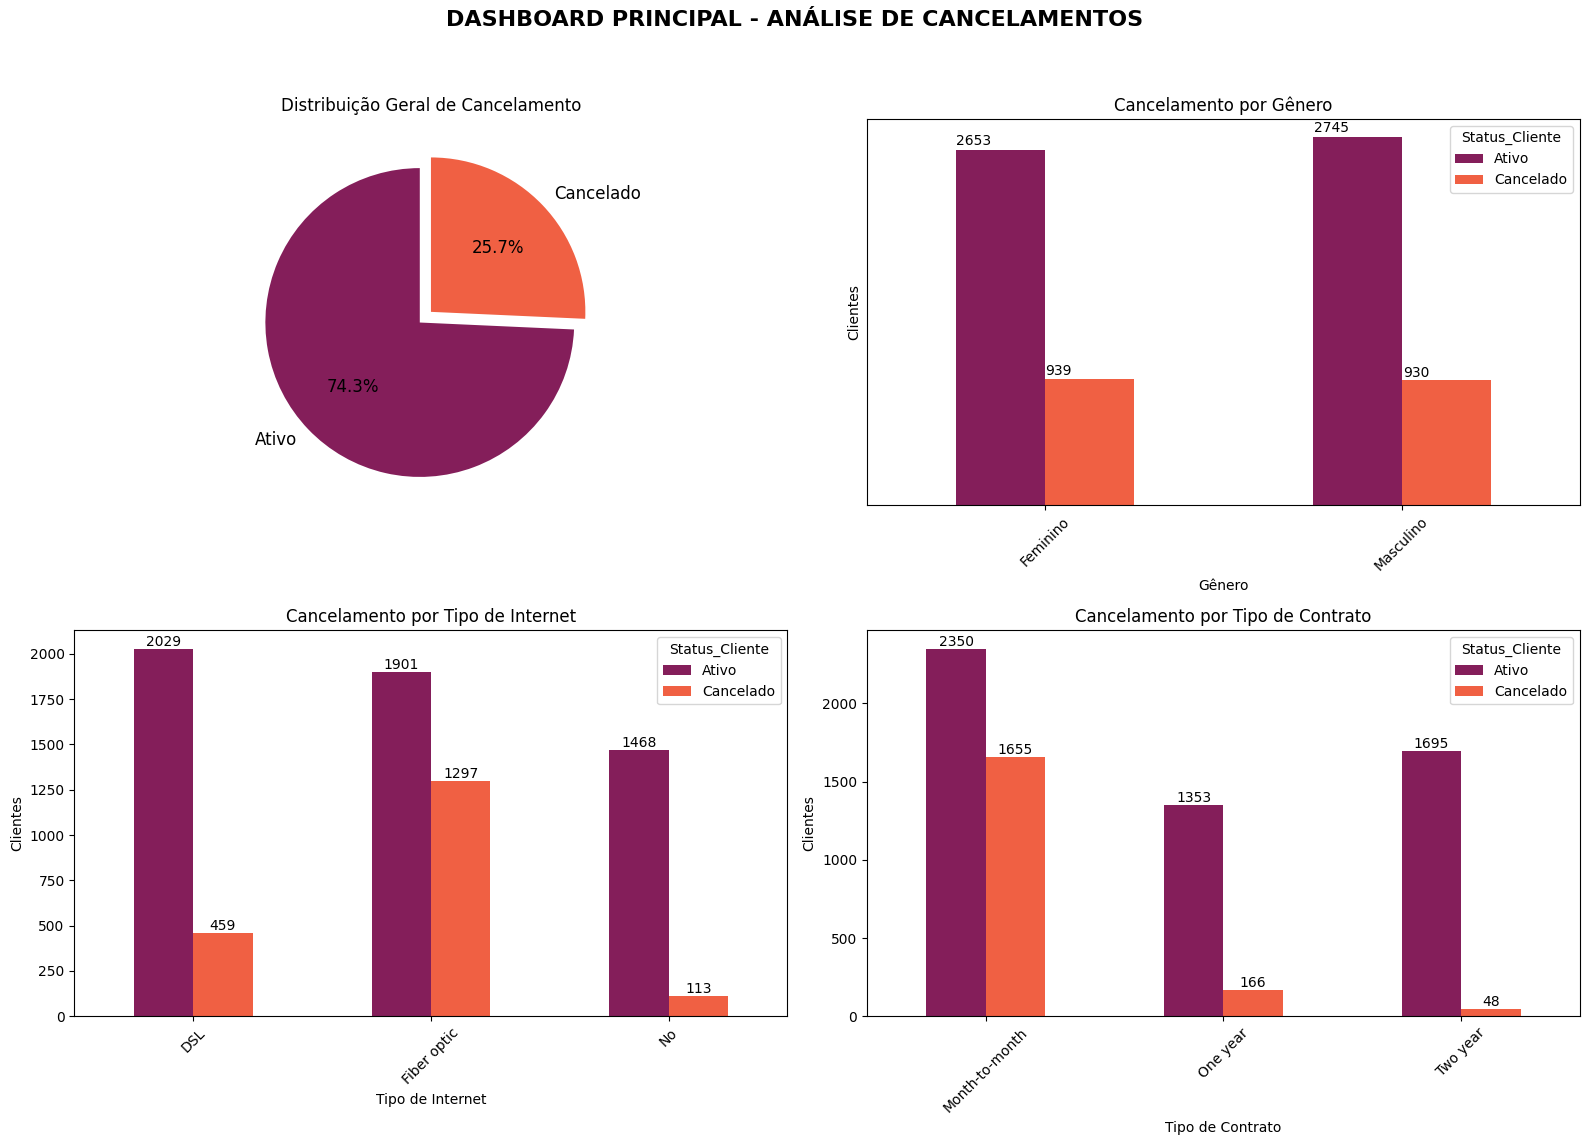

In [15]:
rocket_colors = sns.color_palette("rocket", n_colors=2).as_hex()
destaque = [0.1, 0]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('DASHBOARD PRINCIPAL - ANÁLISE DE CANCELAMENTOS', fontsize=16, fontweight='bold')

# 1. Distribuição Geral de Cancelamento (Pizza)
df_clean['Status_Cliente'].value_counts().plot.pie(
    explode=destaque,
    ax=axes[0, 0],
    autopct='%1.1f%%',
    startangle=90,
    colors=rocket_colors,
    labels=['Ativo', 'Cancelado'],
    textprops={'fontsize': 12}
)
axes[0, 0].set_title('Distribuição Geral de Cancelamento')
axes[0, 0].set_ylabel('')


# 2. Churn por Gênero (Barras)
df_clean.groupby(['Genero', 'Status_Cliente']).size().unstack().plot.bar(
    ax=axes[0, 1],
    color=rocket_colors
)
for p in axes[0, 1].patches:
    axes[0, 1].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),ha='left', va='bottom')

axes[0, 1].set_xticklabels(['Feminino', 'Masculino'],rotation=45)
axes[0, 1].set_title('Cancelamento por Gênero')
axes[0, 1].set_xlabel('Gênero')
axes[0, 1].set_ylabel('Clientes')
axes[0, 1].tick_params(axis='y', length=0)
axes[0, 1].set_yticks([])




# Gráfico de barras: Cancelamento por Tipo de Internet
df_clean.groupby(['Tipo_Internet', 'Status_Cliente']).size().unstack().plot.bar(
    ax=axes[1, 0],
    color=rocket_colors
)

# Adiciona os valores em cima de cada barra
for p in axes[1, 0].patches:
    axes[1, 0].annotate(
        str(int(p.get_height())),                # valor da barra
        (p.get_x() + p.get_width() / 2, p.get_height()),  # posição centralizada
        ha='center', va='bottom', fontsize=10    # alinhamento e tamanho da fonte
    )

axes[1, 0].set_title('Cancelamento por Tipo de Internet')
axes[1, 0].set_xlabel('Tipo de Internet')
axes[1, 0].set_ylabel('Clientes')
axes[1, 0].tick_params(axis='x', rotation=45)




# 4. Churn por Tipo de Contrato (Barras)
df_clean.groupby(['Tipo_Contrato', 'Status_Cliente']).size().unstack().plot.bar(
    ax=axes[1, 1],
    color=rocket_colors
)
# Adiciona os valores em cima de cada barra
for p in axes[1, 1].patches:
    axes[1, 1].annotate(
        str(int(p.get_height())),                # valor da barra
        (p.get_x() + p.get_width() / 2, p.get_height()),  # posição centralizada
        ha='center', va='bottom', fontsize=10    # alinhamento e tamanho da fonte
    )
axes[1, 1].set_title('Cancelamento por Tipo de Contrato')
axes[1, 1].set_xlabel('Tipo de Contrato')
axes[1, 1].set_ylabel('Clientes')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


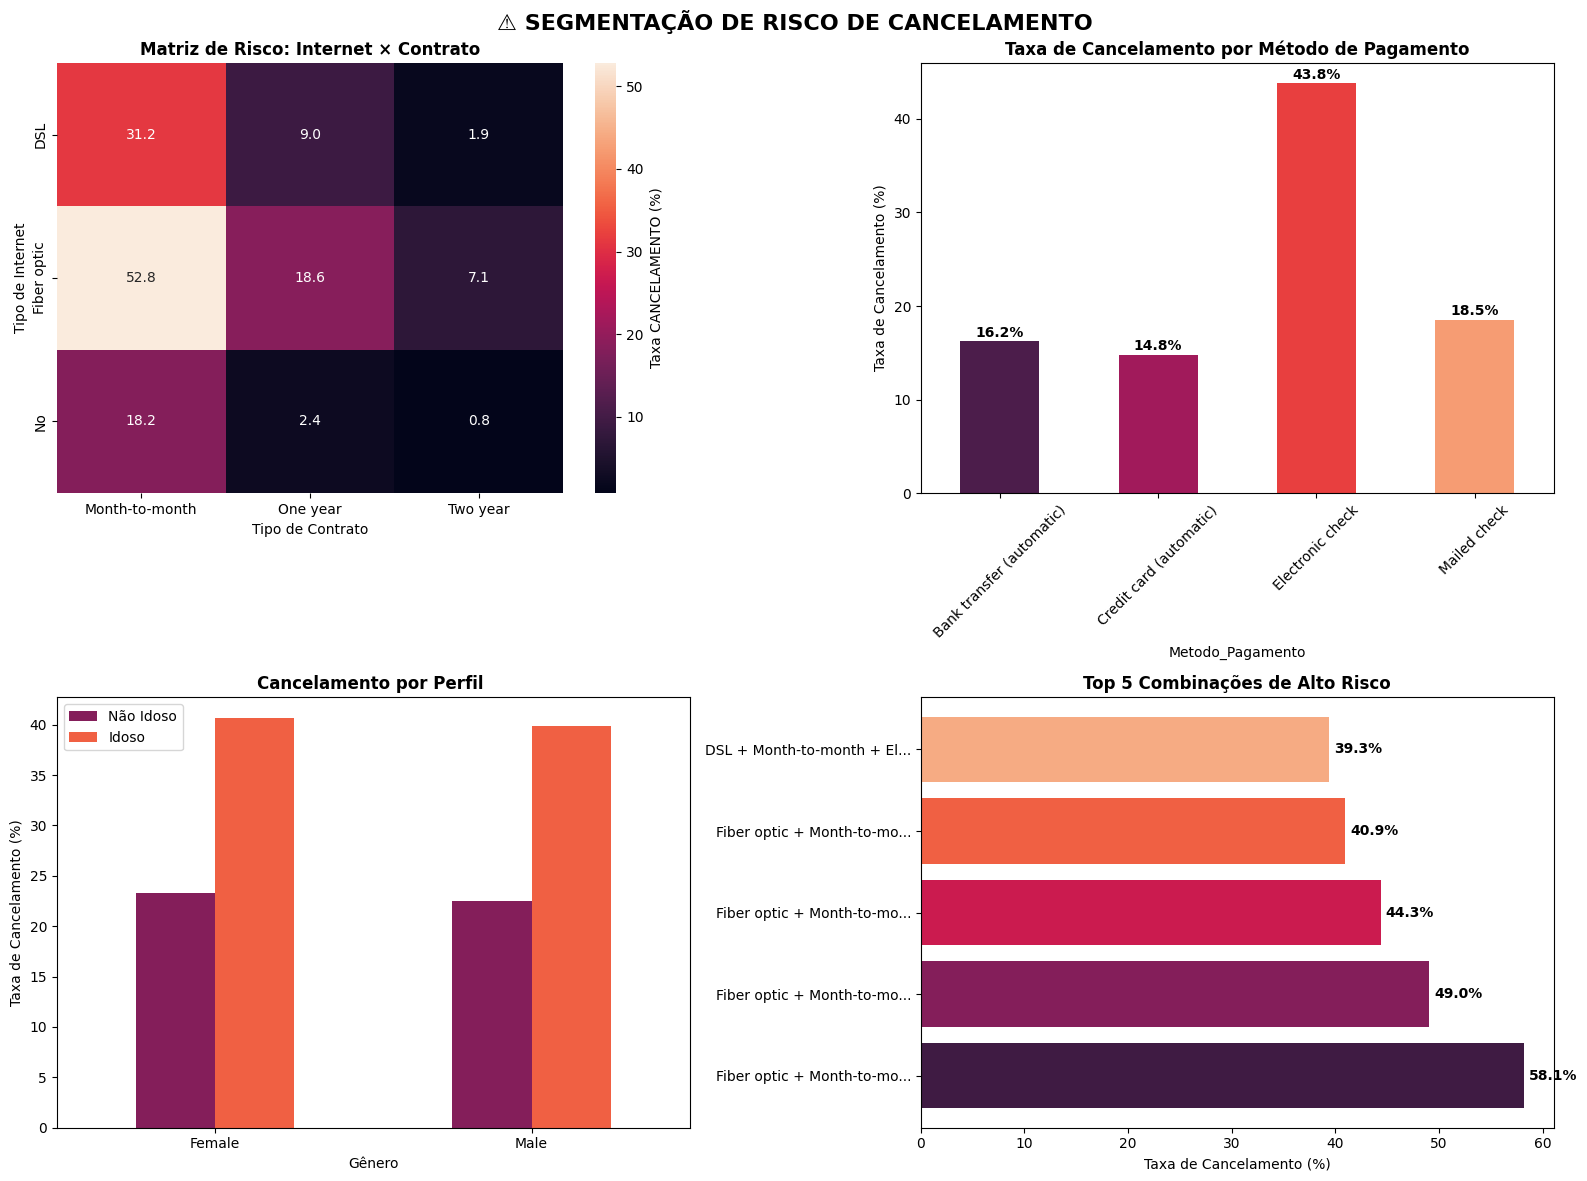

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir rocket como estilo de cor padrão
sns.set_palette("rocket")

# 5. ANÁLISE DE SEGMENTAÇÃO DE RISCO
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('⚠️ SEGMENTAÇÃO DE RISCO DE CANCELAMENTO', fontsize=16, fontweight='bold', y=0.98)

# Matriz de risco: Internet vs Contrato
risk_matrix = df_clean.groupby(['Tipo_Internet', 'Tipo_Contrato'])['Cancelou'].mean() * 100
risk_pivot = risk_matrix.unstack()
sns.heatmap(risk_pivot, annot=True, fmt='.1f', cmap='rocket', ax=ax1, cbar_kws={'label': 'Taxa CANCELAMENTO (%)'})
ax1.set_title('Matriz de Risco: Internet × Contrato', fontweight='bold')
ax1.set_xlabel('Tipo de Contrato')
ax1.set_ylabel('Tipo de Internet')

# Churn por método de pagamento
churn_pagamento = df_clean.groupby('Metodo_Pagamento')['Cancelou'].mean() * 100
colors = sns.color_palette("rocket", n_colors=len(churn_pagamento))
churn_pagamento.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Taxa de Cancelamento por Método de Pagamento', fontweight='bold')
ax2.set_ylabel('Taxa de Cancelamento (%)')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(churn_pagamento.values):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# Perfil de risco
demo_risk = df_clean.groupby(['Genero', 'Idoso'])['Cancelou'].mean() * 100
demo_risk_pivot = demo_risk.unstack()
demo_colors = sns.color_palette("rocket", n_colors=2)
demo_risk_pivot.plot(kind='bar', ax=ax3, color=demo_colors)
ax3.set_title('Cancelamento por Perfil ', fontweight='bold')
ax3.set_xlabel('Gênero')
ax3.set_ylabel('Taxa de Cancelamento (%)')
ax3.tick_params(axis='x', rotation=0)
ax3.legend(['Não Idoso', 'Idoso'])

# Top 5 combinações de maior risco
df_clean['Combinacao_Risco'] = (
    df_clean['Tipo_Internet'] + ' + ' +
    df_clean['Tipo_Contrato'] + ' + ' +
    df_clean['Metodo_Pagamento']
)
top_risk = df_clean.groupby('Combinacao_Risco')['Cancelou'].agg(['mean', 'count'])
top_risk = top_risk[top_risk['count'] >= 50]
top_risk = top_risk.sort_values('mean', ascending=False).head(5)

bar_colors = sns.color_palette("rocket", n_colors=5)
ax4.barh(range(len(top_risk)), top_risk['mean'] * 100, color=bar_colors)
ax4.set_yticks(range(len(top_risk)))
ax4.set_yticklabels([combo[:25] + '...' if len(combo) > 25 else combo for combo in top_risk.index])
ax4.set_xlabel('Taxa de Cancelamento (%)')
ax4.set_title('Top 5 Combinações de Alto Risco', fontweight='bold')
for i, v in enumerate(top_risk['mean'] * 100):
    ax4.text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


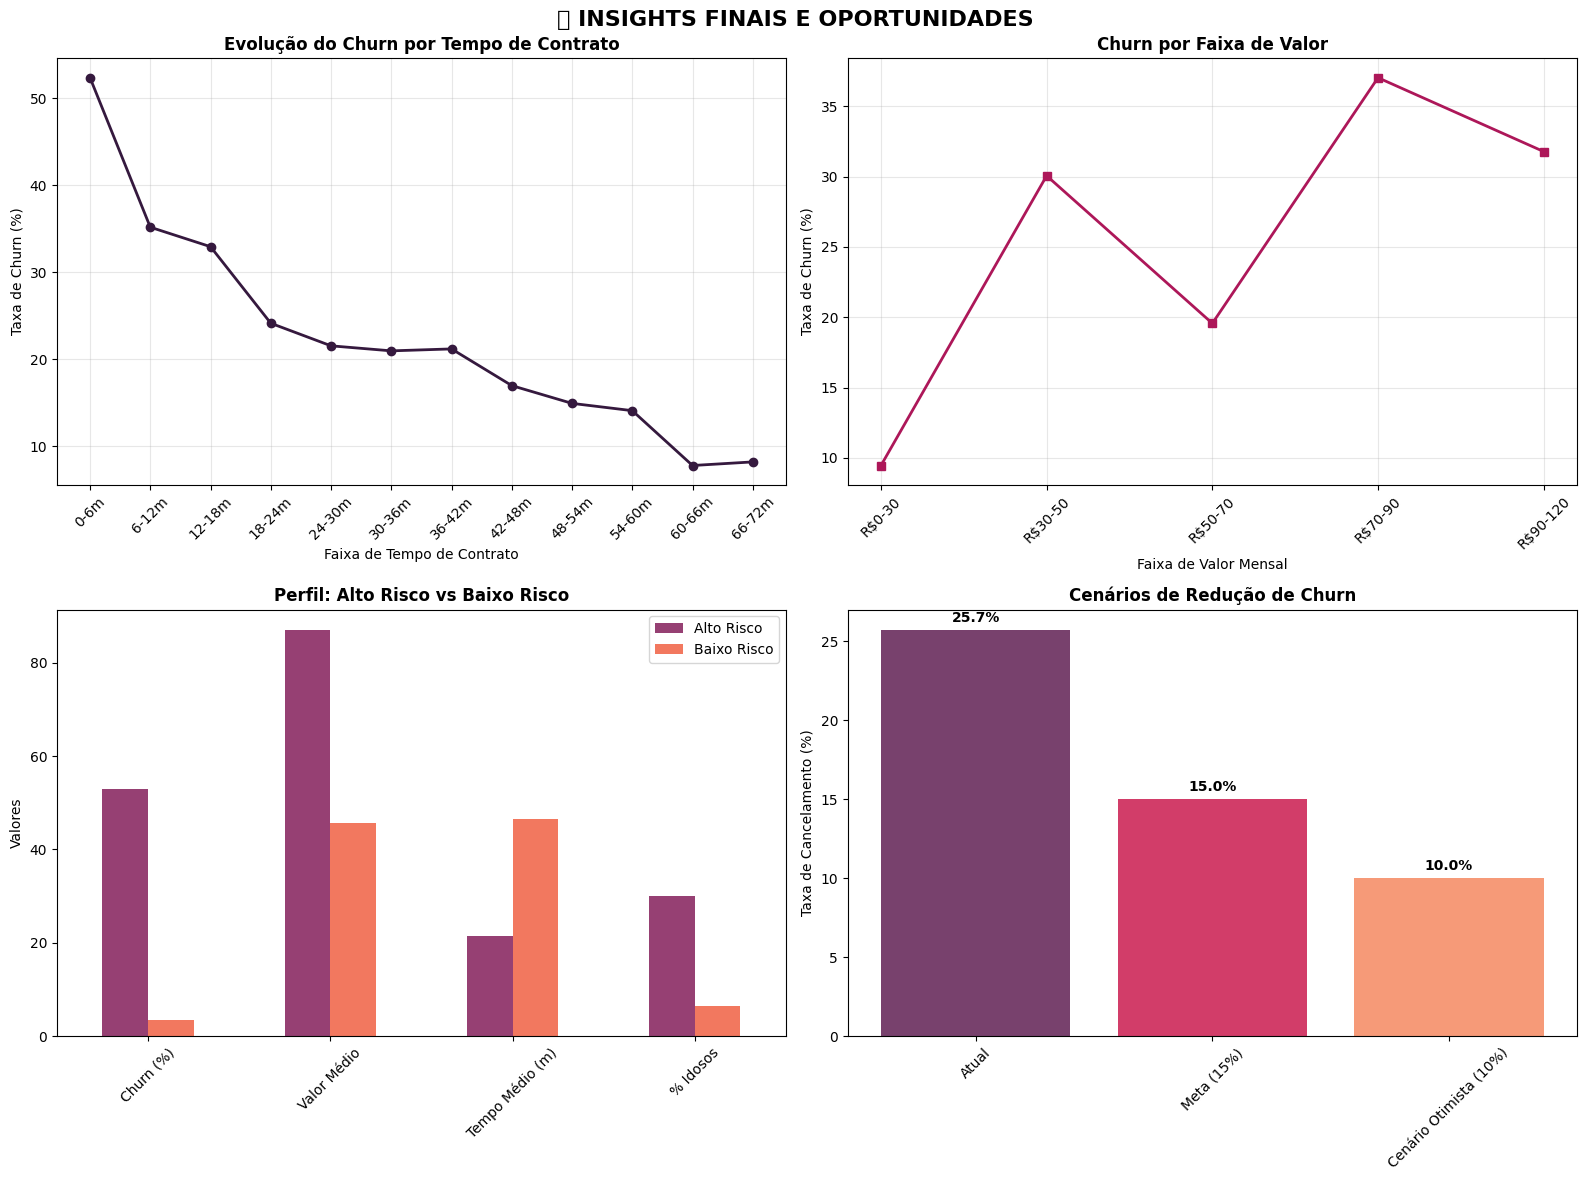

In [33]:

# Aplica rocket como paleta geral
sns.set_palette("rocket")

# 6. GRÁFICO DE TENDÊNCIAS E INSIGHTS FINAIS
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 INSIGHTS FINAIS E OPORTUNIDADES', fontsize=16, fontweight='bold', y=0.98)

# Evolução do churn ao longo do tempo de contrato
tempo_bins = range(0, 73, 6)
churn_tempo_evolucao = []
tempo_labels = []

for i in range(len(tempo_bins)-1):
    mask = (df_clean['Tempo_de_Contrato_Meses'] >= tempo_bins[i]) & (df_clean['Tempo_de_Contrato_Meses'] < tempo_bins[i+1])
    if mask.sum() > 0:
        churn_rate = df_clean[mask]['Cancelou'].mean() * 100
        churn_tempo_evolucao.append(churn_rate)
        tempo_labels.append(f'{tempo_bins[i]}-{tempo_bins[i+1]}m')

ax1.plot(tempo_labels, churn_tempo_evolucao, marker='o', linewidth=2, markersize=6, color=sns.color_palette("rocket")[0])
ax1.set_title('Evolução do Churn por Tempo de Contrato', fontweight='bold')
ax1.set_xlabel('Faixa de Tempo de Contrato')
ax1.set_ylabel('Taxa de Churn (%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Análise de valor vs churn
valor_bins = [0, 30, 50, 70, 90, 120]
churn_valor_evolucao = []
valor_labels = []

for i in range(len(valor_bins)-1):
    mask = (df_clean['Valor_Mensal'] >= valor_bins[i]) & (df_clean['Valor_Mensal'] < valor_bins[i+1])
    if mask.sum() > 0:
        churn_rate = df_clean[mask]['Cancelou'].mean() * 100
        churn_valor_evolucao.append(churn_rate)
        valor_labels.append(f'R${valor_bins[i]}-{valor_bins[i+1]}')

ax2.plot(valor_labels, churn_valor_evolucao, marker='s', linewidth=2, markersize=6, color=sns.color_palette("rocket")[2])
ax2.set_title('Churn por Faixa de Valor', fontweight='bold')
ax2.set_xlabel('Faixa de Valor Mensal')
ax2.set_ylabel('Taxa de Churn (%)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Comparação de perfis: Alto risco vs Baixo risco
alto_risco = df_clean[(df_clean['Tipo_Internet'] == 'Fiber optic') &
                      (df_clean['Tipo_Contrato'] == 'Month-to-month')]
baixo_risco = df_clean[(df_clean['Tipo_Internet'] != 'Fiber optic') &
                       (df_clean['Tipo_Contrato'] != 'Month-to-month')]

perfil_comparacao = pd.DataFrame({
    'Alto Risco': [
        alto_risco['Cancelou'].mean() * 100,
        alto_risco['Valor_Mensal'].mean(),
        alto_risco['Tempo_de_Contrato_Meses'].mean(),
        alto_risco['Idoso'].mean() * 100
    ],
    'Baixo Risco': [
        baixo_risco['Cancelou'].mean() * 100,
        baixo_risco['Valor_Mensal'].mean(),
        baixo_risco['Tempo_de_Contrato_Meses'].mean(),
        baixo_risco['Idoso'].mean() * 100
    ]
}, index=['Churn (%)', 'Valor Médio', 'Tempo Médio (m)', '% Idosos'])

perfil_colors = sns.color_palette("rocket", 2)
perfil_comparacao.plot(kind='bar', ax=ax3, color=perfil_colors, alpha=0.85)
ax3.set_title('Perfil: Alto Risco vs Baixo Risco', fontweight='bold')
ax3.set_ylabel('Valores')
ax3.tick_params(axis='x', rotation=45)
ax3.legend()

# Potencial de retenção (clientes em risco)
clientes_risco = len(alto_risco)
taxa_churn_atual = df_clean['Cancelou'].mean() * 100
meta_churn = 15

potencial_retencao = pd.DataFrame({
    'Cenário': ['Atual', 'Meta (15%)', 'Cenário Otimista (10%)'],
    'Taxa Churn': [taxa_churn_atual, 15, 10],
    'Clientes Perdidos': [
        int(len(df_clean) * taxa_churn_atual / 100),
        int(len(df_clean) * 15 / 100),
        int(len(df_clean) * 10 / 100)
    ]
})

cenarios_colors = sns.color_palette("rocket", 3)
ax4.bar(potencial_retencao['Cenário'], potencial_retencao['Taxa Churn'],
        color=cenarios_colors, alpha=0.85)
ax4.set_title('Cenários de Redução de Churn', fontweight='bold')
ax4.set_ylabel('Taxa de Cancelamento (%)')
ax4.tick_params(axis='x', rotation=45)
for i, v in enumerate(potencial_retencao['Taxa Churn']):
    ax4.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


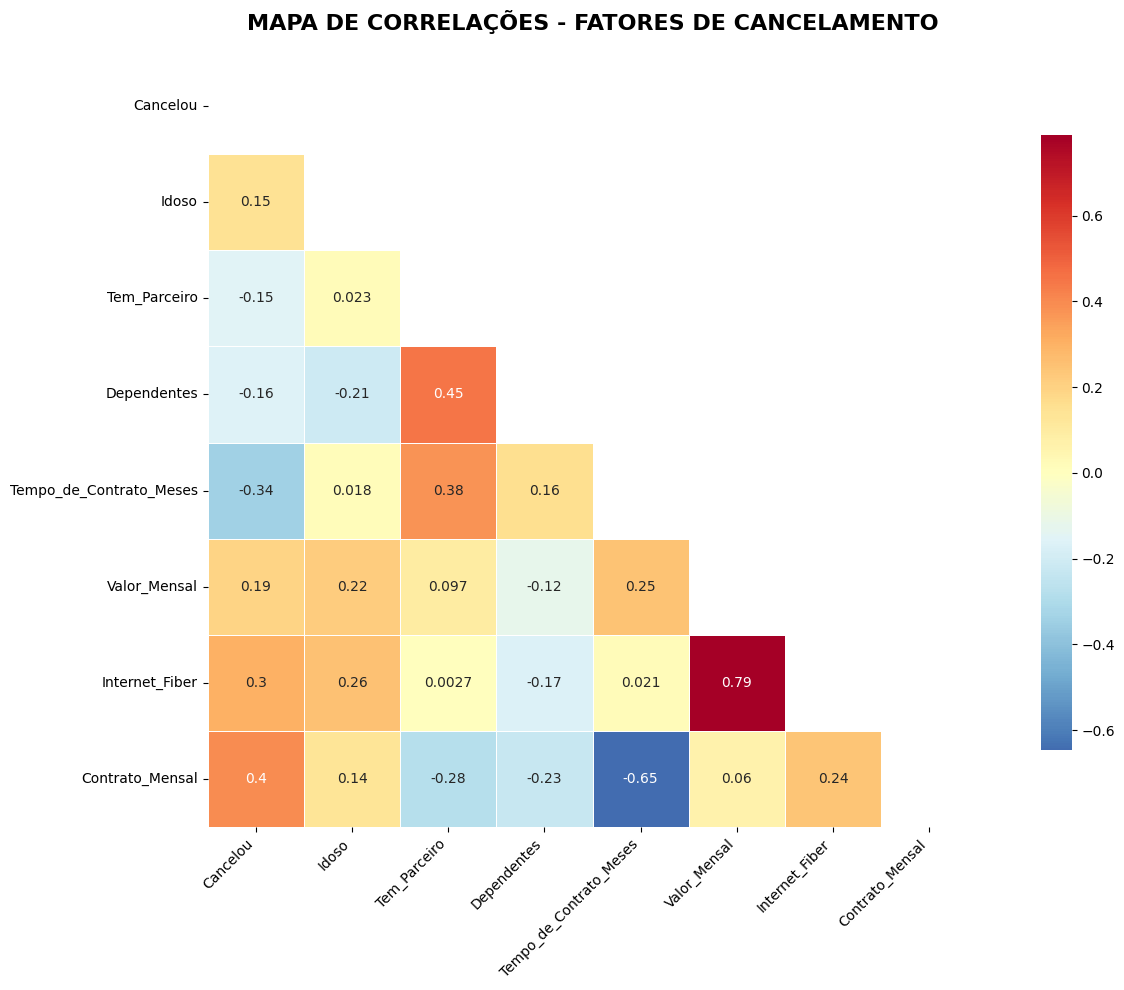

In [29]:
# HEATMAP DE CORRELAÇÕES EXTRA!!
plt.figure(figsize=(14, 10))
# Selecionando apenas colunas numéricas relevantes
cols_numericas = ['Cancelou', 'Idoso', 'Tem_Parceiro', 'Dependentes',
                  'Tempo_de_Contrato_Meses', 'Valor_Mensal']

# Criando variáveis dummy para categóricas importantes
df_corr = df_clean[cols_numericas].copy()
df_corr['Internet_Fiber'] = (df_clean['Tipo_Internet'] == 'Fiber optic').astype(int)
df_corr['Contrato_Mensal'] = (df_clean['Tipo_Contrato'] == 'Month-to-month').astype(int)

correlation_matrix = df_corr.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('MAPA DE CORRELAÇÕES - FATORES DE CANCELAMENTO', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
# RESUMO FINAL
print("\n" + "="*80)
print("📈 RESUMO EXECUTIVO DOS GRÁFICOS")
print("="*80)

total_clientes = len(df_clean)
clientes_cancelados = df_clean['Cancelou'].sum()
taxa_churn = (clientes_cancelados / total_clientes) * 100

print(f"\n🔍 PRINCIPAIS INSIGHTS VISUAIS:")
print(f"• Taxa de Cancelamento Atual: {taxa_churn:.1f}%")
print(f"• Maior Risco: Fiber Optic + Contratos Mensais ({df_clean[(df_clean['Tipo_Internet'] == 'Fiber optic') & (df_clean['Tipo_Contrato'] == 'Month-to-month')]['Cancelou'].mean()*100:.1f}% churn)")
print(f"• Período Crítico: Primeiros 12 meses ({df_clean[df_clean['Tempo_de_Contrato_Meses'] <= 12]['Cancelou'].mean()*100:.1f}% churn)")
print(f"• Impacto Financeiro: Clientes cancelados têm valor médio R$ {df_clean[df_clean['Cancelou']==1]['Valor_Mensal'].mean():.2f}")

print(f"\n🎯 OPORTUNIDADES IDENTIFICADAS:")
print(f"• {len(df_clean[(df_clean['Tipo_Internet'] == 'Fiber optic') & (df_clean['Tipo_Contrato'] == 'Month-to-month')]):,} clientes em alto risco")
print(f"• Potencial de economia anual: R$ {(taxa_churn - 15) / 100 * total_clientes * df_clean['Valor_Mensal'].mean() * 12:,.2f}")
print(f"• Meta: Reduzir Cancelamento para 15% = {int((taxa_churn - 15) / 100 * total_clientes):,} clientes a reter")

print("="*80)


📈 RESUMO EXECUTIVO DOS GRÁFICOS

🔍 PRINCIPAIS INSIGHTS VISUAIS:
• Taxa de Cancelamento Atual: 25.7%
• Maior Risco: Fiber Optic + Contratos Mensais (52.8% churn)
• Período Crítico: Primeiros 12 meses (45.8% churn)
• Impacto Financeiro: Clientes cancelados têm valor médio R$ 74.44

🎯 OPORTUNIDADES IDENTIFICADAS:
• 2,199 clientes em alto risco
• Potencial de economia anual: R$ 604,964.64
• Meta: Reduzir Cancelamento para 15% = 778 clientes a reter
